In [1]:
import numpy as np
import numdifftools as nd
import osr_methods as osr
import line_search_methods as lsm
import matplotlib.pyplot as plt

maxiter = 200
tol = 0.00001
line_step = 0.01
def f(Xn):
    return Xn[0]**2 - 3*Xn[0]*Xn[1] + 4*(Xn[1]**2) + Xn[0] - Xn[1]
def grad_f(Xn):
    return np.array([2*Xn[0] - 3*Xn[1] + 1, -3*Xn[0] + 8*Xn[1] - 1])
def hessian_f(Xn):
    hessian = np.array([[2, -3],
                       [-3, 8]], dtype=float)
    return hessian

P0 = np.array([2,2])

P_0=[2 2], grad=[-1  9], norm_grad=9.055385138137417
P_1=[2.5000037 2.0000000], grad=[0.0000073 7.4999890], norm_grad=7.499989002942044
P_2=[2.5000037 1.0599963], grad=[2.8200183 -0.0200403], norm_grad=2.820089535323776
P_3=[1.0899955 1.0599963], grad=[0.0000019 4.2099843], norm_grad=4.209984267618622
P_4=[1.0899955 0.5299927], grad=[1.5900129 -0.0300451], norm_grad=1.5902967740571223
P_5=[0.2899918 0.5299927], grad=[-0.0099944 2.3699659], norm_grad=2.3699870128129557
P_6=[0.2899918 0.2299890], grad=[0.8900166 -0.0300634], norm_grad=0.8905242003658739
P_7=[-0.1600119 0.2299890], grad=[-0.0099907 1.3199476], norm_grad=1.3199854203262142
P_8=[-0.1600119 0.0649963], grad=[0.4849873 0.0000063], norm_grad=0.48498727227616817
P_9=[-0.4025050 0.0649963], grad=[0.0000011 0.7274856], norm_grad=0.7274855656459999
P_10=[-0.4025050 -0.0259401], grad=[0.2728103 -0.0000058], norm_grad=0.2728103336693397
P_11=[-0.5425086 -0.0259401], grad=[-0.0071970 0.4200052], norm_grad=0.4200668496497396
P_12=[-0.

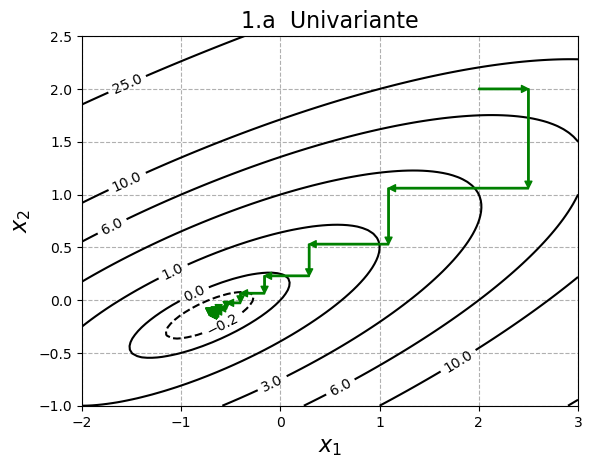

In [2]:
solucao = osr.univariante(P0.copy(), f, grad_f, maxiter, tol, line_step)
#print(f'Pmin={solucao[0][-1]},  passos={solucao[2]},  tempo={solucao[3]}')
pontos = solucao[0]
np.set_printoptions(formatter={'float': "{0:0.7f}".format})
for i in np.arange(len(pontos)):
    print(f'P_{i}={pontos[i]}, grad={grad_f(pontos[i])}, norm_grad={np.linalg.norm(grad_f(pontos[i])):}')
x1 = np.linspace(-2, 3, 100)
x2 = np.linspace(-1, 2.5, 100)
X1, X2 = np.meshgrid(x1, x2)
X3 = f([X1, X2])
niveis = plt.contour(X1, X2, X3, [-0.2, 0, 1, 3, 6, 10, 25], colors='black')
plt.clabel(niveis, inline=1, fontsize=10)

for i in np.arange(len(pontos)-1):
    plt.annotate('', xy=pontos[i+1], xytext=pontos[i],
                arrowprops=dict(width=1, color='green', headwidth=5, headlength=5, shrink=0.0), fontsize='10')
    #plt.plot(pontos[i][0], pontos[i][1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
    #plt.plot(pontos[i+1][0], pontos[i+1][1], marker="o", markersize=1, markeredgecolor="green", markerfacecolor="green")
plt.xlabel('$x_1$', fontsize='16')
plt.ylabel('$x_2$', fontsize='16')
plt.grid(linestyle='--')
plt.title("1.a  Univariante", fontsize='16')
#plt.savefig("A_solution.pdf", format="pdf")
plt.show()

Ciclo=1, Passso 1: dir=[1.0000000 0.0000000], grad=[0.0000073 7.4999890], norm_grad=7.499989002942044 P=[2.5000037 2.0000000] 
Ciclo=1, Passso 2: dir=[0.0000000 1.0000000], grad=[2.8200183 -0.0200403], norm_grad=2.820089535323776 P=[2.5000037 1.0599963] 
Ciclo=1, Passso 3: dir=[0.5000037 -0.9400037], grad=[2.2852018 1.2427984], norm_grad=2.6012871646150733 P=[2.4300013 1.1916003] 
Ciclo=2, Passso 4: dir=[0.0000000 1.0000000], grad=[2.7652128 -0.0372309], norm_grad=2.765463384607955 P=[2.4300013 1.0315966] 
Ciclo=2, Passso 5: dir=[0.5000037 -0.9400037], grad=[2.2303962 1.2256078], norm_grad=2.5449521730538667 P=[2.3599990 1.1632006] 
Ciclo=2, Passso 6: dir=[-0.0700023 -0.0283997], grad=[-0.1893099 0.4666295], norm_grad=0.5035686045460823 P=[-0.7306558 -0.0906672] 
Ciclo=3, Passso 7: dir=[0.5000037 -0.9400037], grad=[0.0067758 0.0036210], norm_grad=0.007682691748888523 P=[-0.7049900 -0.1389186] 
Ciclo=3, Passso 8: dir=[-0.0700023 -0.0283997], grad=[-0.0005383 0.0013268], norm_grad=0.0014

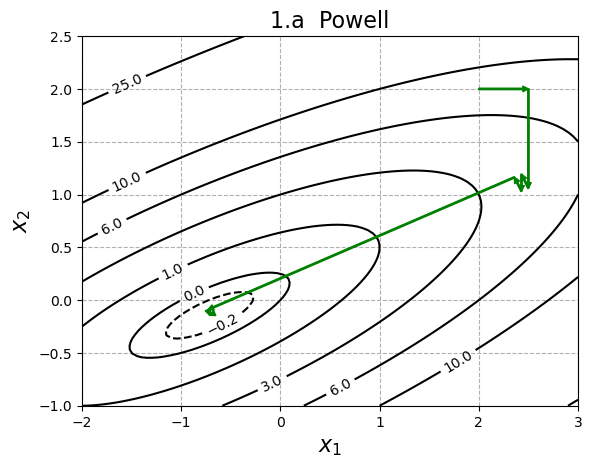

In [3]:
solucao = osr.powell(P0.copy(), f, grad_f, maxiter, tol, line_step)
#solucaov2 = osr.powellv2(P0, f, grad_f, maxiter, tol, line_step)
#print(f'Pmin={solucaov2[0]},  ciclos={solucaov2[1]},  passos={solucaov2[2]}')
print(f'Pmin={solucao[0][-1]},  passos={solucao[2]},  tempo={solucao[3]}')
pontos = solucao[0]
x1 = np.linspace(-2, 3, 100)
x2 = np.linspace(-1, 2.5, 100)
X1, X2 = np.meshgrid(x1, x2)
X3 = f([X1, X2])
niveis = plt.contour(X1, X2, X3, [-0.2, 0, 1, 3, 6, 10, 25], colors='black')
plt.clabel(niveis, inline=1, fontsize=10)

for i in np.arange(len(pontos)-1):
    plt.annotate('', xy=pontos[i+1], xytext=pontos[i],
                arrowprops=dict(width=1, color='green', headwidth=4, headlength=4, shrink=0.0), fontsize='10')
#    #plt.plot(pontos[i][0], pontos[i][1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
#    #plt.plot(pontos[i+1][0], pontos[i+1][1], marker="o", markersize=1, markeredgecolor="green", markerfacecolor="green")
plt.xlabel('$x_1$', fontsize='16')
plt.ylabel('$x_2$', fontsize='16')
plt.grid(linestyle='--')
plt.title("1.a  Powell", fontsize='16')
##plt.savefig("A_solution.pdf", format="pdf")
plt.show()

Pmin=[-0.7142857 -0.1428571],  passos=2,  tempo=0.0034904179992736317


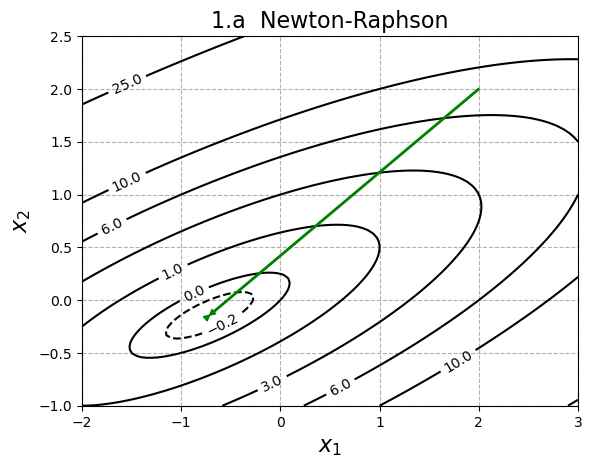

In [4]:
solucao = osr.newtonRaphson(P0.copy(), f, grad_f, hessian_f, maxiter, tol, line_step)
print(f'Pmin={solucao[0][-1]},  passos={solucao[1]},  tempo={solucao[2]}')
pontos = solucao[0]
x1 = np.linspace(-2, 3, 100)
x2 = np.linspace(-1, 2.5, 100)
X1, X2 = np.meshgrid(x1, x2)
X3 = f([X1, X2])
niveis = plt.contour(X1, X2, X3, [-0.2, 0, 1, 3, 6, 10, 25], colors='black')
plt.clabel(niveis, inline=1, fontsize=10)

for i in np.arange(len(pontos)-1):
    plt.annotate('', xy=pontos[i+1], xytext=pontos[i],
                arrowprops=dict(width=1, color='green', headwidth=4, headlength=4, shrink=0.0), fontsize='10')
    #plt.plot(pontos[i][0], pontos[i][1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
    #plt.plot(pontos[i+1][0], pontos[i+1][1], marker="o", markersize=1, markeredgecolor="green", markerfacecolor="green")
plt.xlabel('$x_1$', fontsize='16')
plt.ylabel('$x_2$', fontsize='16')
plt.grid(linestyle='--')
plt.title("1.a  Newton-Raphson", fontsize='16')
#plt.savefig("A_solution.pdf", format="pdf")
plt.show()

Pmin=[-0.7142768 -0.1428538],  passos=46,  tempo=0.09243220900316373


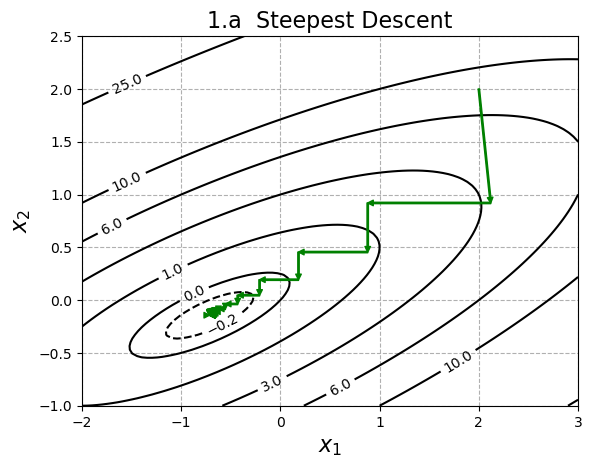

In [5]:
P0 = np.array([2,2])
solucao = osr.steepestDescent(P0.copy(), f, grad_f, maxiter, tol, line_step)
print(f'Pmin={solucao[0][-1]},  passos={solucao[1]},  tempo={solucao[2]}')
pontos = solucao[0]
x1 = np.linspace(-2, 3, 100)
x2 = np.linspace(-1, 2.5, 100)
X1, X2 = np.meshgrid(x1, x2)
X3 = f([X1, X2])
niveis = plt.contour(X1, X2, X3, [-0.2, 0, 1, 3, 6, 10, 25], colors='black')
plt.clabel(niveis, inline=1, fontsize=10)

for i in np.arange(len(pontos)-1):
    plt.annotate('', xy=pontos[i+1], xytext=pontos[i],
                arrowprops=dict(width=1, color='green', headwidth=4, headlength=4, shrink=0.0), fontsize='10')
    #plt.plot(pontos[i][0], pontos[i][1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
    #plt.plot(pontos[i+1][0], pontos[i+1][1], marker="o", markersize=1, markeredgecolor="green", markerfacecolor="green")
plt.xlabel('$x_1$', fontsize='16')
plt.ylabel('$x_2$', fontsize='16')
plt.grid(linestyle='--')
plt.title("1.a  Steepest Descent", fontsize='16')
#plt.savefig("A_solution.pdf", format="pdf")
plt.show()

Passso 1: dir=[ 1 -9], grad_k=[-1  9], grad_k+1=[2.4801063 -0.0002749], P=[2.1200037 0.9199670] 
Passso 2: dir=[-2.4050950 -0.6748269], grad_k=[2.4801063 -0.0002749], grad_k+1=[-0.5563272 1.9799022], P=[-0.5015587 0.1844033] 
Passso 3: dir=[-1.0974689 -2.4439279], grad_k=[-0.5563272 1.9799022], grad_k+1=[0.0806304 -0.0361801], P=[-0.6376424 -0.1186384] 
Passso 4: dir=[-0.0826570 0.0316671], grad_k=[0.0806304 -0.0361801], grad_k+1=[0.0259632 0.0690964], P=[-0.6550007 -0.1119882] 
Passso 5: dir=[-0.0836244 -0.0470056], grad_k=[0.0259632 0.0690964], grad_k+1=[0.0083643 -0.0148803], P=[-0.7111038 -0.1435240] 
Passso 6: dir=[-0.0128367 0.0123664], grad_k=[0.0083643 -0.0148803], grad_k+1=[0.0008314 0.0016131], P=[-0.7126442 -0.1420399] 
Passso 7: dir=[-0.0009765 -0.0014734], grad_k=[0.0008314 0.0016131], grad_k+1=[0.0015715 -0.0010441], P=[-0.7129372 -0.1424819] 
Passso 8: dir=[-0.0026271 -0.0005485], grad_k=[0.0015715 -0.0010441], grad_k+1=[-0.0001249 0.0005981], P=[-0.7141721 -0.1427398] 


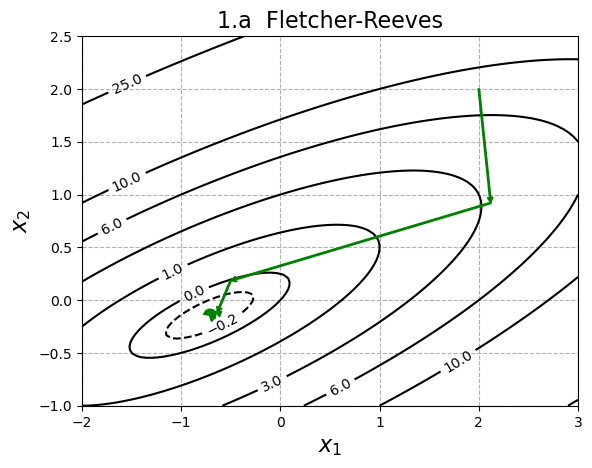

In [6]:
P0 = np.array([2,2])
solucao = osr.fletcherReeves(P0.copy(), f, grad_f, maxiter, tol, line_step)
print(f'Pmin={solucao[0][-1]},  passos={solucao[1]},  tempo={solucao[2]}')
pontos = solucao[0]

x1 = np.linspace(-2, 3, 100)
x2 = np.linspace(-1, 2.5, 100)
X1, X2 = np.meshgrid(x1, x2)
X3 = f([X1, X2])
niveis = plt.contour(X1, X2, X3, [-0.2, 0, 1, 3, 6, 10, 25], colors='black')
plt.clabel(niveis, inline=1, fontsize=10)

for i in np.arange(len(pontos)-1):
    plt.annotate('', xy=pontos[i+1], xytext=pontos[i],
                arrowprops=dict(width=1, color='green', headwidth=4, headlength=4, shrink=0.0), fontsize='10')
    #plt.plot(pontos[i][0], pontos[i][1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
    #plt.plot(pontos[i+1][0], pontos[i+1][1], marker="o", markersize=1, markeredgecolor="green", markerfacecolor="green")
plt.xlabel('$x_1$', fontsize='16')
plt.ylabel('$x_2$', fontsize='16')
plt.grid(linestyle='--')
plt.title("1.a  Fletcher-Reeves", fontsize='16')
#plt.savefig("A_solution.pdf", format="pdf")
plt.show()